### Import libraries

In [52]:
import csv
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sb

from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### How to add a virtual environment into kernel

1. pip install ipykernel
2. python3 -m ipykernel install \
  --user \
  --name machine_learning \
  --display-name "Python (machine_learning)"

### Visualize the dataset by pandas

In [53]:
# with open('winequality-red.csv', newline='') as csv_file:
#     infor_lines = csv.reader(csv_file, delimiter=',')
#     for i in infor_lines:
#         print(i)
'''
read_csv:
    return: DataFrame or TextFileReader

pandas.Dataframe
    method:
        head(n): Return the first n rows
        info():Print a concise summary of a DataFrame
        describe(): Generate descriptive statistics
        hist(): Make a histogram of the DataFrame’s columns
        corr():Compute pairwise correlation of columns, excluding NA/null values (Return: Correlation matrix.)
        drop(): Drop specified labels from rows or columns.
        replace(): Replace values given in to_replace with value
    variables:
        columns: The column labels of the DataFrame
        dtype: Return the dtypes in the DataFrame
'''
df = pd.read_csv('winequality-red.csv')
print(df.head(4))


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


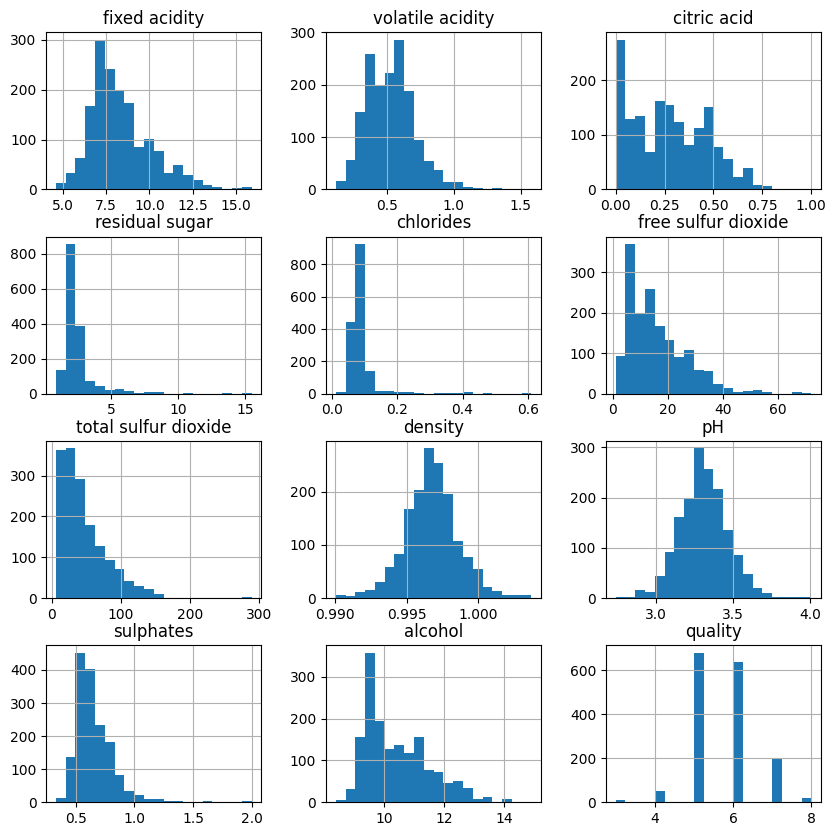

In [56]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

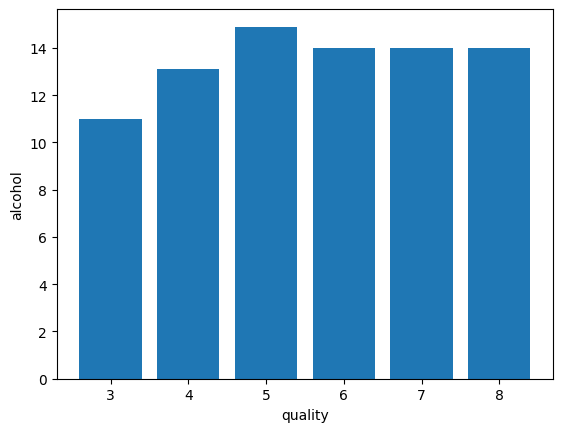

In [57]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

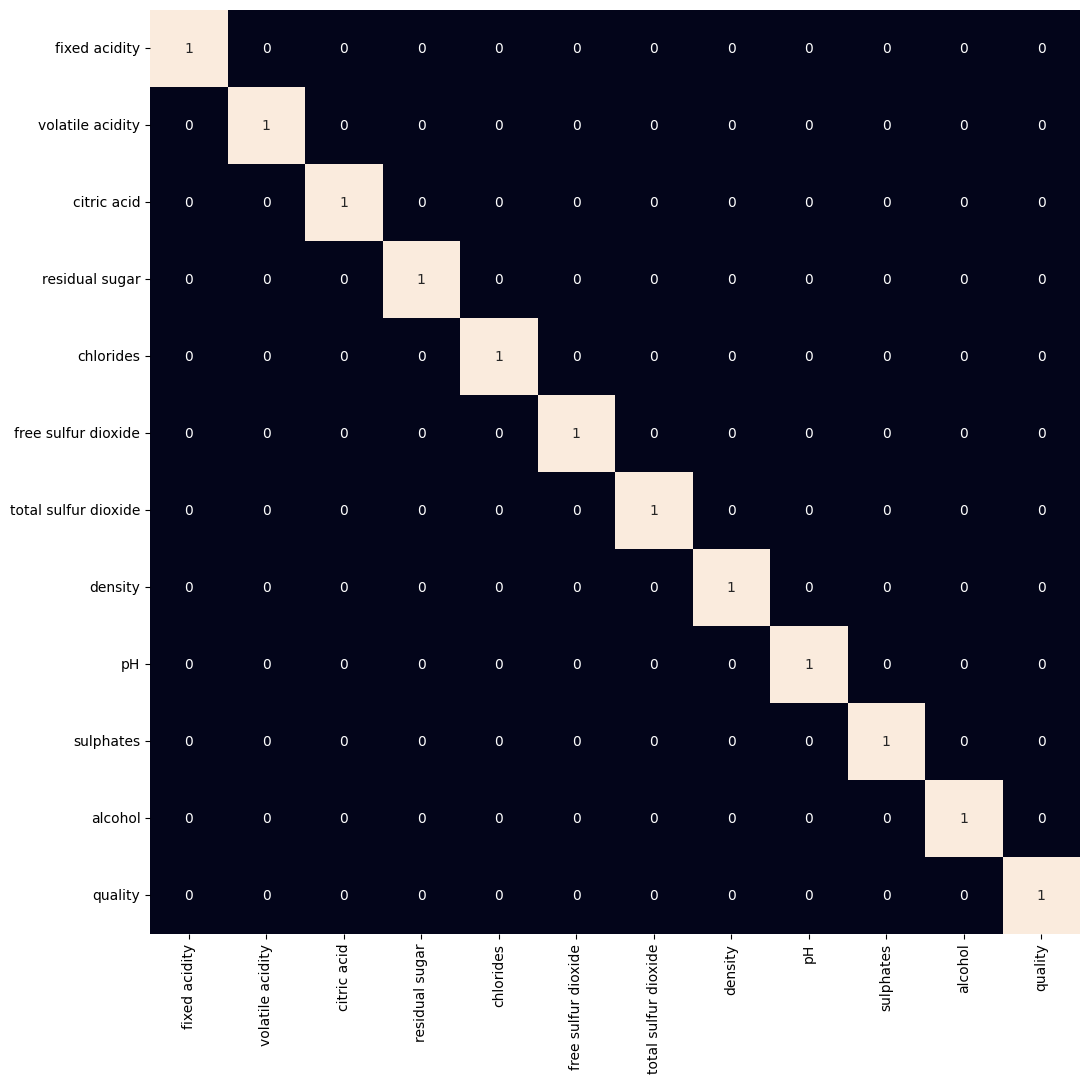

In [58]:
# Convert 'object' columns to numerical if they represent numbers
for col in df.columns:
    if df[col].dtype == 'object': # String
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip columns that cannot be converted

plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [59]:
df = df.drop('total sulfur dioxide', axis=1)  

### Model Development

#### Create label for classification task

In [60]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [61]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0


In [62]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [63]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0


In [68]:
features = df.drop(['quality', 'best quality'], axis=1)
features = features.fillna(features.mean())

In [70]:
target = df['best quality']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=40)

In [73]:

# Impute missing values after splitting
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
x_train = imputer.fit_transform(x_train) #Fit to data, then transform it.
x_test = imputer.transform(x_test)   #Impute all missing values in X

x_train.shape, x_test.shape

((1279, 10), (320, 10))

In [74]:
model = LogisticRegression()

model.fit(x_train, y_train)

/home/tuld/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [78]:
print('Model: ', model)
print('Training Accuracy : ', metrics.roc_auc_score(y_train, model.predict(x_train)))
print('Validation Accuracy : ', metrics.roc_auc_score(y_test, model.predict(x_test)))
print()

Model:  LogisticRegression()
Training Accuracy :  0.7284798872171218
Validation Accuracy :  0.7745271519012229



### Model Evaluation

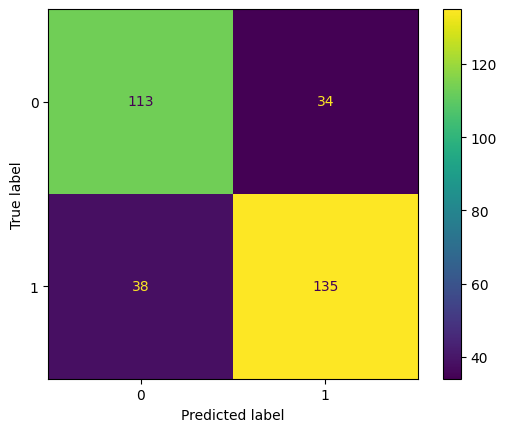

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, model.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) # Assuming your model has a 'classes_' attribute
disp.plot()
plt.show()

In [84]:
print(metrics.classification_report(y_test,
                                    model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       147
           1       0.80      0.78      0.79       173

    accuracy                           0.78       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.78      0.78      0.78       320



import csv